# Training the data with simple Neural Network


In [36]:
import numpy as np
import pandas as pd
#dataset import


dataset = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\Features60(δ).csv')
X, y = dataset.iloc[:,2:].values , dataset['In_halo'].values

#dataset = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\equal_15_200K.csv')
#X, y = dataset.iloc[:,3:].values , dataset['in_halo'].values
#dataset = np.load(r'C:\Users\Saba\Documents\ML project\QUIZ\particle_mini.npz')
#X, y = dataset['X'], dataset['Y']
# The labels are 1 or 2. So we need to turn them into 0 and  1. 
#y = (y>1.5).astype(int)

print(X)
print(y)
print(len(y))
print(len(X[0]))
print(len(y[y==0]))
print(len(y[y==1]))

[[-0.00068421 -0.02019946 -0.01128301 ... -0.01087234 -0.01080634
   0.15519924]
 [ 0.00234402 -0.01661045 -0.00787625 ... -0.0087792  -0.00933429
   0.1198517 ]
 [ 0.00234402 -0.02289122 -0.01431124 ... -0.01050832 -0.01014742
   0.15710207]
 ...
 [-0.02793827 -0.01661045 -0.01279712 ... -0.01089055 -0.01121291
   0.0505791 ]
 [-0.02491004 -0.029172   -0.0283168  ... -0.01183701 -0.01108674
   0.08320039]
 [-0.07941818 -0.03993904 -0.03399473 ... -0.01200082 -0.01090448
   0.02455228]]
[0. 0. 0. ... 0. 0. 0.]
60000
12
31439
28561


## Data


In [37]:
dataset.describe()

,id,In_halo,den_rc=0.8,den_rc=1.2,den_rc=1.6,den_rc=2,den_rc=2.4,den_rc=2.8,den_rc=3.2,den_rc=3.6,den_rc=4,den_rc=4.4,den_rc=4.8,v^2
count,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,9.372267e+06,0.476017,0.005677,0.005859,0.005295,0.004678,0.004135,0.003656,0.003237,0.002867,0.002559,0.002297,0.002077,0.172864
std,5.644118e+06,0.499429,0.030297,0.023206,0.019581,0.017042,0.015110,0.013578,0.012325,0.011272,0.010380,0.009620,0.008964,0.129865
min,1.940170e+05,0.000000,-0.112729,-0.084802,-0.074497,-0.062945,-0.054744,-0.048694,-0.043221,-0.039673,-0.036272,-0.033569,-0.031289,0.000072
25%,4.014925e+06,0.000000,-0.015825,-0.009432,-0.007876,-0.006741,-0.005843,-0.005257,-0.004895,-0.004448,-0.004124,-0.003828,-0.003670,0.075292
50%,8.866210e+06,0.000000,0.005372,0.006718,0.006129,0.005469,0.004924,0.004419,0.003953,0.003461,0.002998,0.002578,0.002260,0.140793
75%,1.455314e+07,1.000000,0.026570,0.021971,0.018999,0.016904,0.014793,0.013247,0.011949,0.010839,0.009999,0.009240,0.008597,0.238242
max,1.948887e+07,1.000000,0.132558,0.094649,0.073129,0.060704,0.053824,0.046726,0.042799,0.039684,0.037181,0.033193,0.030131,1.000000


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
id            60000 non-null float64
In_halo       60000 non-null float64
den_rc=0.8    60000 non-null float64
den_rc=1.2    60000 non-null float64
den_rc=1.6    60000 non-null float64
den_rc=2      60000 non-null float64
den_rc=2.4    60000 non-null float64
den_rc=2.8    60000 non-null float64
den_rc=3.2    60000 non-null float64
den_rc=3.6    60000 non-null float64
den_rc=4      60000 non-null float64
den_rc=4.4    60000 non-null float64
den_rc=4.8    60000 non-null float64
v^2           60000 non-null float64
dtypes: float64(14)
memory usage: 6.4 MB


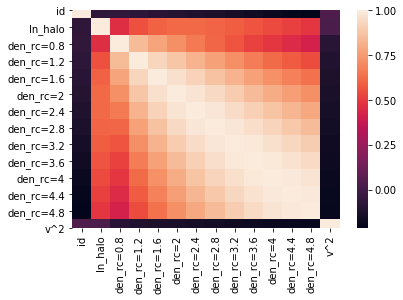

In [39]:
import seaborn as sns
import matplotlib as plt
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

1 is the highsest correlation and we expect each feature to have a correlation of 1 with itself. We can see that the corelation between density features get lower and lower as their cut off radius difference decrease.

***As we expected previously the correlation of $v^2$ and particle's ID with the classification labels is nearly zero which is logical in the sense that ID has no physical meaning and also the future of our particles can be fully characterized by the information about it's densities.*** 

It's possible that we become interested in the correlation of two specific feature, we can check it as follows:

In [40]:
dataset['In_halo'].corr(dataset['den_rc=2.8'])

0.604984865226971

In [41]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.20994831 -1.12295196 -0.84661991 ... -1.36896799 -1.43716418
  -0.13602214]
 [-0.10999752 -0.96829065 -0.67263765 ... -1.15139132 -1.2729506
  -0.40821114]
 [-0.10999752 -1.23894795 -1.00127081 ... -1.33112857 -1.36365906
  -0.12136959]
 ...
 [-1.10950548 -0.96829065 -0.92394536 ... -1.37085996 -1.48251841
  -0.94163556]
 [-1.00955469 -1.50960524 -1.71653122 ... -1.46924246 -1.46844296
  -0.69043968]
 [-2.80866902 -1.97358918 -2.00650166 ... -1.4862702  -1.44811176
  -1.14205158]]


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

In [43]:
from keras import utils
y_u_test = utils.to_categorical(y_test)
y_u_train = utils.to_categorical(y_train)

print(y_test)
print(y_u_test)
print(y_train)
print(y_u_train)

[0. 0. 0. ... 1. 1. 1.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1. 1. 0. ... 0. 1. 1.]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


## Designing Neural Network 

In [44]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import initializers

# Neural network
model = Sequential()
model.add(Dense(9, input_dim=12, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(7, activation='softmax'))
model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

layer = layers.Dense(
    units=64,
    kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer='zeros'
)

# BatchNormalization(
#     axis=-1,
#     momentum=0.99,
#     epsilon=0.001,
#     center=True,
#     scale=True,
#     beta_initializer="zeros",
#     gamma_initializer="ones",
#     moving_mean_initializer="zeros",
#     moving_variance_initializer="ones",
#     beta_regularizer=None,
#     gamma_regularizer=None,
#     beta_constraint=None,
#     gamma_constraint=None,
#     trainable=True
# )
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.01)
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss='binary_crossentropy', optimizer = opt , metrics=['accuracy'])


In [45]:
history = model.fit(X_train, y_u_train,validation_data = (X_test,y_u_test), epochs=400, batch_size=1000)

Train on 30000 samples, validate on 30000 samples
Epoch 1/400
30000/30000 [==============================] - 1s 36us/step - loss: 0.6523 - accuracy: 0.6453 - val_loss: 0.6206 - val_accuracy: 0.7509
Epoch 2/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.5803 - accuracy: 0.7620 - val_loss: 0.5362 - val_accuracy: 0.7782
Epoch 3/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.5056 - accuracy: 0.7879 - val_loss: 0.4821 - val_accuracy: 0.7948
Epoch 4/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4707 - accuracy: 0.7949 - val_loss: 0.4618 - val_accuracy: 0.7979
Epoch 5/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4567 - accuracy: 0.7970 - val_loss: 0.4521 - val_accuracy: 0.7992
Epoch 6/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4492 - accuracy: 0.7971 - val_loss: 0.4463 - val_accuracy: 0.8000
Epoch 7/400
30000/30000 [==============================] - 0s 9us/

30000/30000 [==============================] - 0s 8us/step - loss: 0.4235 - accuracy: 0.8013 - val_loss: 0.4241 - val_accuracy: 0.8017
Epoch 57/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4232 - accuracy: 0.8017 - val_loss: 0.4239 - val_accuracy: 0.8015
Epoch 58/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4234 - accuracy: 0.8011 - val_loss: 0.4236 - val_accuracy: 0.8018
Epoch 59/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4232 - accuracy: 0.8014 - val_loss: 0.4236 - val_accuracy: 0.8019
Epoch 60/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4230 - accuracy: 0.8015 - val_loss: 0.4237 - val_accuracy: 0.8020
Epoch 61/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4231 - accuracy: 0.8017 - val_loss: 0.4238 - val_accuracy: 0.8014
Epoch 62/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4230 - accuracy: 0.8021 - val_loss: 0.4245 

30000/30000 [==============================] - 0s 9us/step - loss: 0.4214 - accuracy: 0.8028 - val_loss: 0.4224 - val_accuracy: 0.8017
Epoch 112/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4214 - accuracy: 0.8019 - val_loss: 0.4224 - val_accuracy: 0.8025
Epoch 113/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4214 - accuracy: 0.8023 - val_loss: 0.4224 - val_accuracy: 0.8020
Epoch 114/400
30000/30000 [==============================] - 0s 11us/step - loss: 0.4214 - accuracy: 0.8019 - val_loss: 0.4225 - val_accuracy: 0.8018
Epoch 115/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4214 - accuracy: 0.8022 - val_loss: 0.4224 - val_accuracy: 0.8018
Epoch 116/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4214 - accuracy: 0.8021 - val_loss: 0.4224 - val_accuracy: 0.8019
Epoch 117/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4213 - accuracy: 0.8022 - val_los

Epoch 166/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4208 - accuracy: 0.8026 - val_loss: 0.4220 - val_accuracy: 0.8021
Epoch 167/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4208 - accuracy: 0.8031 - val_loss: 0.4220 - val_accuracy: 0.8019
Epoch 168/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4208 - accuracy: 0.8030 - val_loss: 0.4220 - val_accuracy: 0.8018
Epoch 169/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4208 - accuracy: 0.8032 - val_loss: 0.4220 - val_accuracy: 0.8022
Epoch 170/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4208 - accuracy: 0.8025 - val_loss: 0.4220 - val_accuracy: 0.8022
Epoch 171/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4208 - accuracy: 0.8031 - val_loss: 0.4220 - val_accuracy: 0.8018
Epoch 172/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4208 - accuracy: 0.8025

Epoch 221/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4206 - accuracy: 0.8029 - val_loss: 0.4219 - val_accuracy: 0.8021
Epoch 222/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4206 - accuracy: 0.8030 - val_loss: 0.4219 - val_accuracy: 0.8023
Epoch 223/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4206 - accuracy: 0.8030 - val_loss: 0.4219 - val_accuracy: 0.8024
Epoch 224/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4206 - accuracy: 0.8024 - val_loss: 0.4219 - val_accuracy: 0.8019
Epoch 225/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4206 - accuracy: 0.8028 - val_loss: 0.4219 - val_accuracy: 0.8023
Epoch 226/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4206 - accuracy: 0.8028 - val_loss: 0.4219 - val_accuracy: 0.8022
Epoch 227/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4206 - accuracy: 

Epoch 276/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4205 - accuracy: 0.8031 - val_loss: 0.4218 - val_accuracy: 0.8023
Epoch 277/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4205 - accuracy: 0.8030 - val_loss: 0.4218 - val_accuracy: 0.8023
Epoch 278/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4205 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8024
Epoch 279/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4205 - accuracy: 0.8030 - val_loss: 0.4218 - val_accuracy: 0.8024
Epoch 280/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4205 - accuracy: 0.8031 - val_loss: 0.4218 - val_accuracy: 0.8024
Epoch 281/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4205 - accuracy: 0.8031 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 282/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4205 - accuracy:

30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 331/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8031 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 332/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 333/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 334/400
30000/30000 [==============================] - 0s 11us/step - loss: 0.4204 - accuracy: 0.8030 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 335/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 336/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8031 - val_loss:

Epoch 385/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 386/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 387/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 388/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 389/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 390/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 391/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy:

In [46]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer = opt , metrics=['accuracy'])

history2 = model.fit(X_train, y_u_train,validation_data = (X_test,y_u_test), epochs=400, batch_size=1000)

Train on 30000 samples, validate on 30000 samples
Epoch 1/400
30000/30000 [==============================] - 1s 37us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 2/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 3/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 4/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 5/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 6/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 7/400
30000/30000 [==============================] - 0s 11

Epoch 56/400
30000/30000 [==============================] - 0s 11us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 57/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 58/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 59/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 60/400
30000/30000 [==============================] - 0s 11us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8027
Epoch 61/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 62/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4204 - accuracy: 0.8033 -

Epoch 111/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 112/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 113/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 114/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 115/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 116/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4218 - val_accuracy: 0.8026
Epoch 117/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032

Epoch 166/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 167/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 168/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 169/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 170/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 171/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 172/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8033

Epoch 221/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 222/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 223/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 224/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 225/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 226/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 227/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032

Epoch 276/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 277/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 278/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 279/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 280/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 281/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 282/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032

Epoch 331/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 332/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 333/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 334/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 335/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8031 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 336/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 337/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8031

Epoch 386/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8031 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 387/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8031 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 388/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 389/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 390/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4204 - accuracy: 0.8031 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 391/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032 - val_loss: 0.4217 - val_accuracy: 0.8026
Epoch 392/400
30000/30000 [==============================] - 0s 7us/step - loss: 0.4204 - accuracy: 0.8032

In [21]:
#history = model.fit(X_train, y_u_train, epochs=1000, batch_size=1000)

In [47]:
y_pred = model.predict_classes(X_test)
#Converting predictions to label
print(y_pred)
print(y_test)

[0 0 0 ... 1 1 1]
[0. 0. 0. ... 1. 1. 1.]


In [48]:
y_u_pred = model.predict(X_test)
print(y_u_pred)
pred = list()
for i in range(len(y_pred)):
     pred.append(np.argmax(y_u_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_u_test[i]))

[[0.54903454 0.4509655 ]
 [0.97091407 0.02908599]
 [0.50904065 0.49095938]
 ...
 [0.22903982 0.77096015]
 [0.05383825 0.9461618 ]
 [0.05383825 0.9461618 ]]


In [49]:
print(len(y_pred))

30000


In [50]:
# #Particle data test
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(121 , xlabel = '$\delta(rc=2.1)$', ylabel='$\delta(rc=3)$' , title = 'Result of the Classification')

# ax.scatter(X_test[:,0],X_test[:,1], c=y_test)    

# ax = fig.add_subplot(122 , xlabel = '$\delta(rc=2.1)$', ylabel='$\delta(rc=3)$' , title = 'Predicitions of the Neural Network')
# plt.scatter(X_test[:,0], X_test[:,1] ,  c =y_pred)
# plt.show()


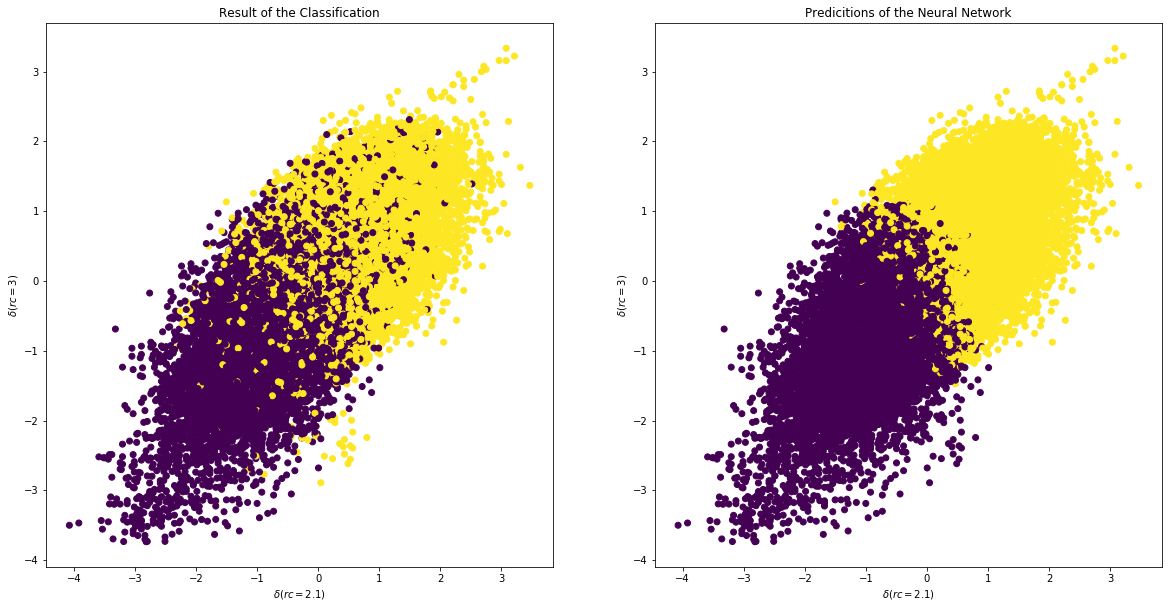

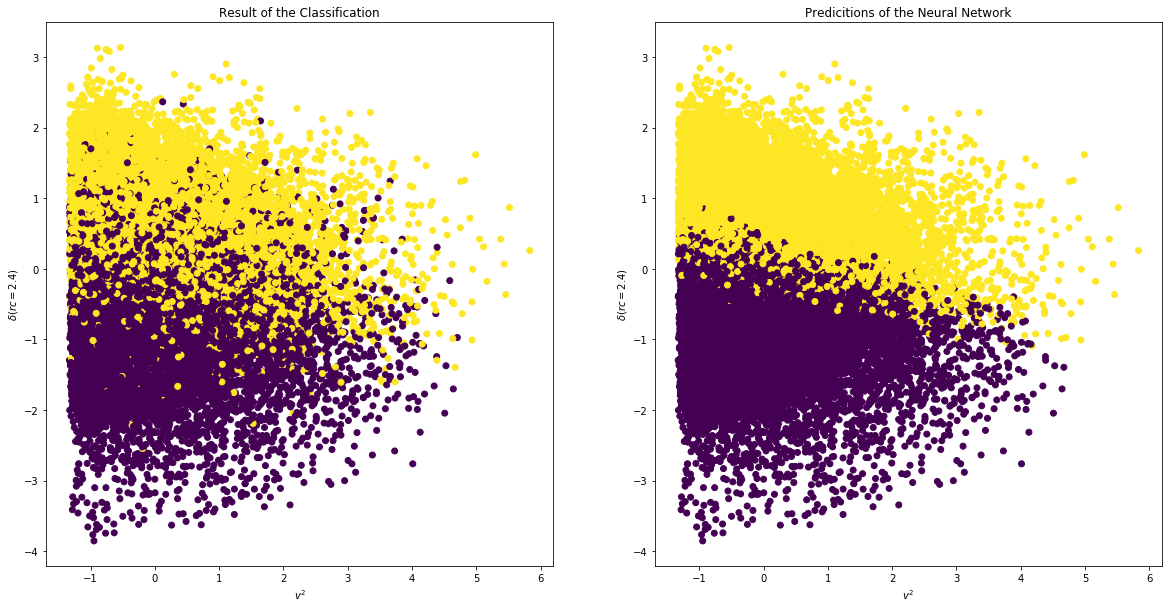

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=2.1)$', ylabel='$\delta(rc=3)$' , title = 'Result of the Classification')

ax.scatter(X_test[:,2], X_test[:,8], c=y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=2.1)$', ylabel='$\delta(rc=3)$' , title = 'Predicitions of the Neural Network')
plt.scatter(X_test[:,2], X_test[:,8],  c =y_pred)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$v^2$', ylabel='$\delta(rc=2.4)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(X_test[:,-1].T, X_test[:,5] , c=y_test)    

ax = fig.add_subplot(122 , xlabel = '$v^2$', ylabel='$\delta(rc=2.4)$' , title = 'Predicitions of the Neural Network')
plt.scatter(X_test[:,-1].T, X_test[:,5] , c = y_pred)
plt.show()

In [52]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 80.25999999999999


In [53]:
#history = model.fit(X_train, y_u_train,validation_data = (X_test,y_u_test), epochs=5000, batch_size=1000)

[array([[-0.8149284 ,  0.869272  ],
       [ 0.99621344,  0.75510514],
       [ 1.6034044 , -0.6805188 ]], dtype=float32), array([-1.4332149,  1.4332145], dtype=float32)]


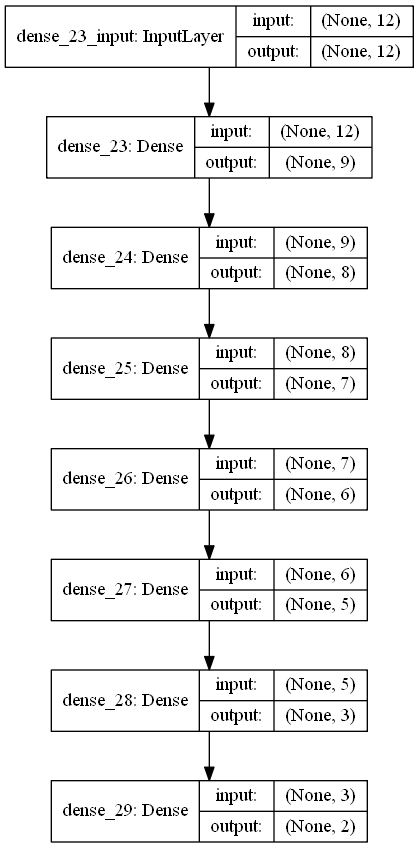

In [54]:
#getting the hyperparameters of the model:
for layer in model.layers:
    weights = layer.get_weights()
print(weights)  
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True,)

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 9)                 117       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 63        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                

# Evaluating the Loss and Accuracy of the model to prevent overfit

The Accuracy and loss curves for different architectures of the NN showed us that complex models with many nodes and layers will increase the train accuracy and decrease the train loss but the model will eventually work badly on the evaluation data. Means that accuracy on the validation will be really lower compared to the train one.

So for prevent this effect we need to employ simpler models to prevent the overfitting.

It can be seen that our loss doesn't reduce properly which is sighn for the inner limitation of our data, which does not let us to predict the result with 100% accuracy.

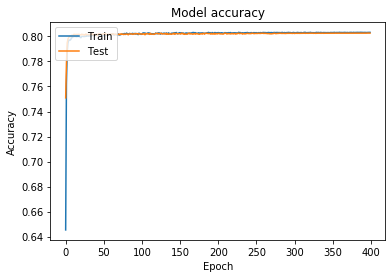

In [56]:
#print(history.history)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

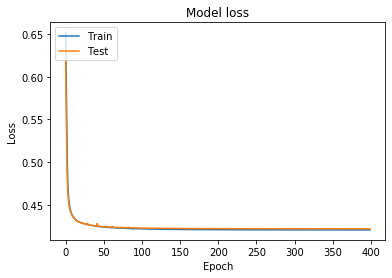

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


In [58]:
score = model.evaluate(X_test, y_u_test,verbose=1)

print(score)

y_pred = model.predict_classes(X_test)

print(y_pred)

30000/30000 [==============================] - 1s 19us/step
[0.42174158720970156, 0.8026000261306763]
[0 0 0 ... 1 1 1]


### Now for comparing the neural network model with the designed random forest model we want to see the result of our tuned random forest on this train and test sets:

In [60]:
from sklearn.ensemble import RandomForestClassifier
import timeit
%alias_magic t timeit


classifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 4, 
                                    max_features = 'sqrt', max_depth = 10, bootstrap = True, random_state=0)

%t classifier.fit(X_train , y_train)

#Testing the classification on the test sample
Y_predict_rf = classifier.predict(X_test)

print(len(y_test))
print(len(Y_predict_rf[Y_predict_rf == 1]))

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.
34.8 s ± 806 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
30000
14781


In [61]:
from sklearn.metrics import classification_report
clf_report_rf = classification_report(y_test, Y_predict_rf)
print(clf_report_rf)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81     15687
         1.0       0.78      0.81      0.80     14313

    accuracy                           0.80     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.80      0.80      0.80     30000



In [63]:
a = accuracy_score(pred,test)
#b = accuracy_score(pred,train)
print('Accuracy is:', a*100)

Accuracy is: 80.25999999999999


### Let's do the job with our other possible data like oriented densities and the ones with different number of features and data size.

## Oriented Density Feature


In [20]:
dataset_oriented = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\all_Features5.csv')
X, y = dataset.iloc[:,2:].values , dataset['In_halo'].values

print(X)
print(y)
print(len(y))
print(len(X[0]))
print(len(y[y==0]))
print(len(y[y==1]))

[[-0.00068421 -0.02019946 -0.01128301 ... -0.01087234 -0.01080634
   0.15519924]
 [ 0.00234402 -0.01661045 -0.00787625 ... -0.0087792  -0.00933429
   0.1198517 ]
 [ 0.00234402 -0.02289122 -0.01431124 ... -0.01050832 -0.01014742
   0.15710207]
 ...
 [-0.02793827 -0.01661045 -0.01279712 ... -0.01089055 -0.01121291
   0.0505791 ]
 [-0.02491004 -0.029172   -0.0283168  ... -0.01183701 -0.01108674
   0.08320039]
 [-0.07941818 -0.03993904 -0.03399473 ... -0.01200082 -0.01090448
   0.02455228]]
[0. 0. 0. ... 0. 0. 0.]
60000
12
31439
28561


In [21]:
dataset_oriented.describe()

,id,In_halo,den0.8=000,den0.8=001,den0.8=010,den0.8=011,den0.8=100,den0.8=101,den0.8=110,den0.8=111,...,den1.4=110,den1.4=111,den1.6=000,den1.6=001,den1.6=010,den1.6=011,den1.6=100,den1.6=101,den1.6=110,den1.6=111
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.841428e+06,0.281600,0.000151,-0.000057,0.000584,0.000066,0.000449,-0.000043,0.000683,0.000278,...,0.001059,0.000313,0.000287,-0.000461,0.000672,0.000022,0.000720,-0.000224,0.001109,0.000298
std,5.526661e+06,0.449782,0.029596,0.029707,0.029714,0.029634,0.029578,0.029679,0.029645,0.029754,...,0.020756,0.020792,0.019317,0.019341,0.019293,0.019378,0.019088,0.019150,0.019133,0.019188
min,1.940140e+05,0.000000,-0.112729,-0.118785,-0.121813,-0.121813,-0.115757,-0.112729,-0.115757,-0.121813,...,-0.085210,-0.078994,-0.073740,-0.074119,-0.074497,-0.069576,-0.075633,-0.068062,-0.080554,-0.072605
25%,5.022925e+06,0.000000,-0.018854,-0.018854,-0.018854,-0.018854,-0.018854,-0.018854,-0.018854,-0.018854,...,-0.012885,-0.014015,-0.012797,-0.013554,-0.012419,-0.013176,-0.012040,-0.013176,-0.011662,-0.012797
50%,9.761514e+06,0.000000,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,-0.000684,...,0.000675,0.000110,0.000073,-0.000306,0.000451,-0.000306,0.000830,-0.000306,0.000830,0.000073
75%,1.467276e+07,1.000000,0.020513,0.020513,0.020513,0.020513,0.020513,0.020513,0.020513,0.020513,...,0.014801,0.014236,0.013321,0.012564,0.013700,0.012943,0.013700,0.012943,0.014078,0.013321
max,1.948906e+07,1.000000,0.129530,0.120445,0.138614,0.132558,0.129530,0.132558,0.159812,0.153756,...,0.103512,0.096731,0.074643,0.080321,0.086756,0.091298,0.075022,0.071236,0.095462,0.089406


In [22]:
dataset_oriented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
id            100000 non-null int64
In_halo       100000 non-null int64
den0.8=000    100000 non-null float64
den0.8=001    100000 non-null float64
den0.8=010    100000 non-null float64
den0.8=011    100000 non-null float64
den0.8=100    100000 non-null float64
den0.8=101    100000 non-null float64
den0.8=110    100000 non-null float64
den0.8=111    100000 non-null float64
den1=000      100000 non-null float64
den1=001      100000 non-null float64
den1=010      100000 non-null float64
den1=011      100000 non-null float64
den1=100      100000 non-null float64
den1=101      100000 non-null float64
den1=110      100000 non-null float64
den1=111      100000 non-null float64
den1.2=000    100000 non-null float64
den1.2=001    100000 non-null float64
den1.2=010    100000 non-null float64
den1.2=011    100000 non-null float64
den1.2=100    100000 non-null float64
den1.2=101    100000

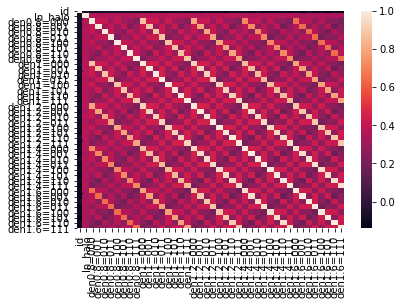

In [23]:
corr = dataset_oriented.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [24]:
X = sc.fit_transform(X)
print(X)

X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size = 0.5)

y_u_test = utils.to_categorical(y_test)
y_u_train = utils.to_categorical(y_train)

print(y_test)
print(y_u_test)
print(y_train)
print(y_u_train)

[[-0.20994831 -1.12295196 -0.84661991 ... -1.36896799 -1.43716418
  -0.13602214]
 [-0.10999752 -0.96829065 -0.67263765 ... -1.15139132 -1.2729506
  -0.40821114]
 [-0.10999752 -1.23894795 -1.00127081 ... -1.33112857 -1.36365906
  -0.12136959]
 ...
 [-1.10950548 -0.96829065 -0.92394536 ... -1.37085996 -1.48251841
  -0.94163556]
 [-1.00955469 -1.50960524 -1.71653122 ... -1.46924246 -1.46844296
  -0.69043968]
 [-2.80866902 -1.97358918 -2.00650166 ... -1.4862702  -1.44811176
  -1.14205158]]
[1. 1. 0. ... 1. 1. 1.]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[0. 0. 0. ... 0. 0. 1.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [34]:
# Designing Neural network
model_oriented = Sequential()
model_oriented.add(Dense(9, input_dim=12, activation='relu'))
#model_oriented.add(Dense(8, activation='tanh'))
#model_oriented.add(Dense(7, activation='softmax'))
model_oriented.add(Dense(6, activation='relu'))
#model_oriented.add(Dense(5, activation='relu'))
model_oriented.add(Dense(3, activation='tanh'))
# model_oriented.add(Dense(12, activation='relu'))
# model_oriented.add(Dense(5, activation='relu'))
# model_oriented.add(Dense(3, activation='relu'))
model_oriented.add(Dense(2, activation='softmax'))

layer = layers.Dense(
    units=64,
    kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer='zeros'
)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.01)
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

model_oriented.compile(loss='binary_crossentropy', optimizer = opt , metrics=['accuracy'])


In [35]:
history = model.fit(X_train, y_u_train,validation_data = (X_test,y_u_test), epochs=400, batch_size=1000)

Train on 30000 samples, validate on 30000 samples
Epoch 1/400
30000/30000 [==============================] - 0s 8us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 2/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 3/400
30000/30000 [==============================] - 0s 11us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 4/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 5/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4134 - accuracy: 0.8078 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 6/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 7/400
30000/30000 [==============================] - 0s 10us/

30000/30000 [==============================] - 0s 10us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 56/400
30000/30000 [==============================] - 0s 9us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 57/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 58/400
30000/30000 [==============================] - 0s 10us/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4278 - val_accuracy: 0.7988
Epoch 59/400
29000/30000 [============================>.] - ETA: 0s - loss: 0.4134 - accuracy: 0.8080

KeyboardInterrupt: 

In [29]:
y_pred = model.predict_classes(X_test)
#Converting predictions to label
print(y_pred)
print(y_test)

y_u_pred = model.predict(X_test)
print(y_u_pred)
pred = list()
for i in range(len(y_pred)):
     pred.append(np.argmax(y_u_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_u_test[i]))
    
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

[0 0 0 ... 1 0 1]
[1. 1. 0. ... 1. 1. 1.]
[[0.5247077  0.4752923 ]
 [0.6028587  0.39714128]
 [0.62177616 0.37822387]
 ...
 [0.0431076  0.95689243]
 [0.97028244 0.02971755]
 [0.08165035 0.9183497 ]]
Accuracy is: 79.88


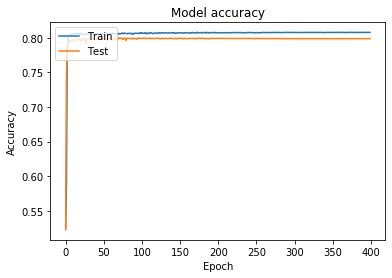

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

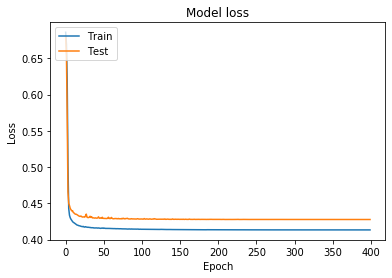

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Conclusion
 We can see neural network works just slightly better than random forest which is even ignorable! The results of all the models that we used by now, points out a fact about our data. It seems that we cannot get an accuracy beter than 80% with our current informations. It can be for two reasons which we will focus on them in the following path of the project:

#### 1- The informations about density fields at z=127 alone is not enough for predicting the halo distributions at z=0 completely. So maybe wee need other informations like tidal shears and etc at z=127 to make our predictions better. But it's important to note that velocities did "no better" to our result. also maybe getting some features from the middle snapshots between z=127 and z=0 make the cllasification better, but the challange is, we want to see the pure effect of initial condition of z=127 on the halo distribution at current cosmos.

#### 2- The system has some irreducable inhere randomness which can be caused by chao effects and etc, so as a result we cannot make our prediction better than a constant limit which our task is finding this limit.

***Searches continues...***